## Sales Data Analysis: Uncovering Trends and Insights from a Real-World Sales Dataset

In today’s competitive market, data-driven decision-making is crucial for businesses to optimize their sales strategies. Sales data contains valuable insights that can help organizations understand customer behavior, identify seasonal trends, and improve overall performance. By analyzing a real-world sales dataset, businesses can make informed decisions to boost revenue and enhance customer satisfaction.

## Objective

Your analysis in this mini project will focus on cleaning, exploring, and visualizing a sales dataset to extract meaningful insights using python and data visualization libraries.

## About the Dataset

The **[dataset](https://drive.google.com/file/d/1V6HTxMsNQswvL_K39UWB7dh8Un8f4oz7/view?usp=sharing)** used in this analysis is a real-world sales dataset containing transaction records from a retail business. It includes the following key features:

- `OrderID`: The id of the order that was placed.
- `Date`: The date the order was placed.
- `CustomerID`: The customer ID that represents the customer who made the purchase.
- `Product`: The class of product that was purchased.
- `Quantity`: The quantity of the product that was purchased.
- `Price`: Unit price of the product in dollars.
- `Total`: The total cost of the purchase in dollars.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Dataset.csv")
df.head()

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19


# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     200 non-null    int64  
 1   Date        200 non-null    object 
 2   CustomerID  200 non-null    object 
 3   Product     190 non-null    object 
 4   Quantity    200 non-null    int64  
 5   Price       200 non-null    int64  
 6   Total       194 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


In [4]:
df.isnull().sum()

OrderID        0
Date           0
CustomerID     0
Product       10
Quantity       0
Price          0
Total          6
dtype: int64

In [5]:
P_map = {600:'Phone', 1000:'Laptop', 200:'Monitor', 400:'Tablet', 100:'Headphones'}

df['Product'] = df['Product'].fillna(df['Price'].map(P_map))

df[df["Product"].isnull()]

,OrderID,Date,CustomerID,Product,Quantity,Price,Total


In [6]:
df['Total'] = df['Total'].fillna(df['Quantity']*df['Price'])

df[df["Total"].isnull()]

,OrderID,Date,CustomerID,Product,Quantity,Price,Total


In [7]:
df.isnull().sum()

OrderID       0
Date          0
CustomerID    0
Product       0
Quantity      0
Price         0
Total         0
dtype: int64

In [8]:
df[df.duplicated()]

,OrderID,Date,CustomerID,Product,Quantity,Price,Total


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     200 non-null    int64         
 1   Date        200 non-null    datetime64[ns]
 2   CustomerID  200 non-null    object        
 3   Product     200 non-null    object        
 4   Quantity    200 non-null    int64         
 5   Price       200 non-null    int64         
 6   Total       200 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 11.1+ KB


In [10]:
df.to_csv("Clean_Dataset.csv", index=False)

# Exploratory Analysis

In [11]:
df.describe()

,OrderID,Date,Quantity,Price,Total
count,200.000000,200,200.00000,200.000000,200.000000
mean,100.500000,2024-07-06 23:09:36,1.36500,676.000000,933.009550
min,1.000000,2024-01-02 00:00:00,1.00000,100.000000,93.310000
25%,50.750000,2024-04-08 18:00:00,1.00000,400.000000,564.002500
50%,100.500000,2024-07-09 12:00:00,1.00000,600.000000,838.350000
75%,150.250000,2024-09-27 18:00:00,2.00000,1000.000000,1062.367500
max,200.000000,2024-12-29 00:00:00,3.00000,1000.000000,3293.240000
std,57.879185,NaN,0.61943,300.291316,647.446344


In [12]:
df.describe(include='object')

,CustomerID,Product
count,200,200
unique,20,5
top,C003,Laptop
freq,17,81


In [88]:
# Different products available?

print('Product Available:', df['Product'].unique())

Product Available: ['Phone' 'Laptop' 'Monitor' 'Tablet' 'Headphones']


In [84]:
# How many Order records do we have in the dataset?

count = pd.Series(df['OrderID'].count(), index=['Number of sales record:']).to_frame(name='Value')
count

,Value
Number of sales record:,200


In [83]:
# Total Revenue in the year 2014

rev = df['Total'].sum().round(2)

revenue = pd.Series(rev, index=['Total Revenue in the year 2014:']).to_frame(name='Value')
revenue

,Value
Total Revenue in the year 2014:,186601.91


In [85]:
# Sales Count of products

df['Product'].value_counts()

Product
Laptop        81
Phone         63
Tablet        31
Monitor       15
Headphones    10
Name: count, dtype: int64

In [30]:
# Top 10 Customers

df['CustomerID'].value_counts()[:10].reset_index()

,CustomerID,count
0,C003,17
1,C001,17
2,C016,16
3,C020,14
4,C017,14
5,C002,12
6,C019,11
7,C008,11
8,C006,10
9,C005,10


In [17]:
# Adds the day name of the purchase

df['Day'] = df['Date'].dt.day_name()

df.head()

,OrderID,Date,CustomerID,Product,Quantity,Price,Total,Day
0,1,2024-04-12,C002,Phone,1,600,642.09,Friday
1,2,2024-12-14,C003,Laptop,2,1000,2098.39,Saturday
2,3,2024-09-27,C017,Monitor,1,200,196.34,Friday
3,4,2024-04-16,C005,Phone,3,600,1955.86,Tuesday
4,5,2024-03-12,C017,Laptop,1,1000,1098.19,Tuesday


In [18]:
# Adds the month of the purchase

df['Month'] = df['Date'].dt.month_name()

df.head()

,OrderID,Date,CustomerID,Product,Quantity,Price,Total,Day,Month
0,1,2024-04-12,C002,Phone,1,600,642.09,Friday,April
1,2,2024-12-14,C003,Laptop,2,1000,2098.39,Saturday,December
2,3,2024-09-27,C017,Monitor,1,200,196.34,Friday,September
3,4,2024-04-16,C005,Phone,3,600,1955.86,Tuesday,April
4,5,2024-03-12,C017,Laptop,1,1000,1098.19,Tuesday,March


In [27]:
# Monthly Sales

monthly_sales = df.groupby('Month')[['Total']].sum().sort_values(ascending=False, by='Total')
monthly_sales

,Total
Month,
December,21722.82
August,18018.66
November,16908.88
April,15942.33
October,15905.58
February,15593.58
May,15425.28
June,15249.31
July,14710.40


In [24]:
# average sales by day

daily_avg_sales = df.groupby('Day')['Total'].apply('mean').round(2).sort_values(ascending=False).reset_index()
daily_avg_sales

,Day,Total
0,Wednesday,1183.50
1,Thursday,1011.56
2,Monday,979.83
3,Saturday,942.26
4,Sunday,942.22
5,Tuesday,905.56
6,Friday,604.17


In [41]:
# Top 3 Product that drives the revenue

df.groupby('Product')['Total'].sum().sort_values(ascending=False).reset_index()[:3]

,Product,Total
0,Laptop,114529.57
1,Phone,49211.36
2,Tablet,17119.23


In [46]:
# Minimum Sales

mini = df['Total'].min()

min_cost = pd.Series(mini, index=['Minimum Sales']).to_frame(name='Value')
min_cost

,Value
Minimum Sales,93.31


In [ ]:
# Minimum Sales

mini = df['Total'].min()

min_cost = pd.Series(mini, index=['Minimum Sales']).to_frame(name='Value')
min_cost

In [42]:
# Product Sales across the month

df.pivot_table('Total', 'Product', 'Month', aggfunc={'Total':sum})

Month,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Headphones,NaN,304.28,297.11,298.59,322.75,103.66,NaN,NaN,NaN,NaN,NaN,NaN
Laptop,9980.84,7319.49,15723.98,7842.08,4731.51,9502.27,10291.04,9265.59,7741.31,11260.79,11022.39,9848.28
Monitor,808.92,927.05,202.27,836.43,NaN,403.43,407.38,NaN,NaN,419.11,NaN,410.77
Phone,4325.53,6659.62,5499.46,5440.57,2477.05,1845.86,4148.34,2547.68,6041.64,4797.01,2405.14,3023.46
Tablet,827.04,2808.22,NaN,1175.91,1223.78,2855.18,402.55,1980.39,1642.33,431.97,2478.05,1293.81


# Visualization

In [98]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

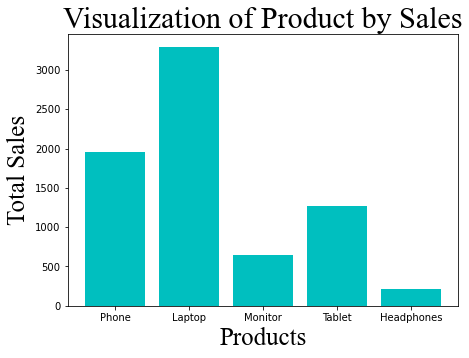

In [63]:
# Products With the highest Revenue?

font="Times New Roman"

plt.figure(figsize=(7,5))

# plt.bar(df['Product'], df['Total'].sort_values(ascending=False), color='c')
plt.bar(df['Product'], df['Total'], color='c')
plt.title("Visualization of Product by Sales", fontname=font, fontsize=30)
plt.xlabel("Products", fontname=font, fontsize=25)
plt.ylabel("Total Sales", fontname=font, fontsize=25)

plt.show()

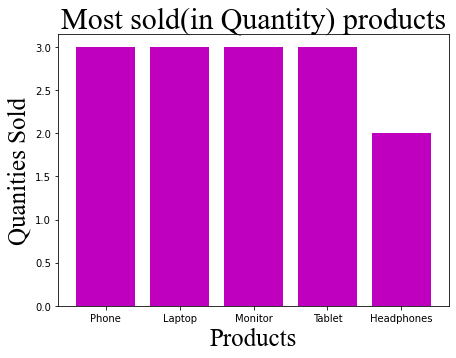

In [61]:
# Most sold products?    product.valuecount*quantity(where name is same)

font="Times New Roman"

plt.figure(figsize=(7,5))

plt.bar(df['Product'], df['Quantity'], color='m')
plt.title("Most sold(in Quantity) products", fontname=font, fontsize=30)
plt.xlabel("Products", fontname=font, fontsize=25)
plt.ylabel("Quanities Sold", fontname=font, fontsize=25)

plt.show()

In [142]:
# Mapping of Month Name to Month Number to make it in order

monthly_sales = df.groupby(df['Date'].dt.month)['Total'].sum().reset_index()
monthly_sales.columns = ['Month', 'Total']

m_mapping = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
monthly_sales['Month_Name'] = monthly_sales['Month'].map(m_mapping)

monthly_sales

,Month,Total,Month_Name
0,1,8755.09,January
1,2,15593.58,February
2,3,13793.66,March
3,4,15942.33,April
4,5,15425.28,May
5,6,15249.31,June
6,7,14710.40,July
7,8,18018.66,August
8,9,14576.32,September
9,10,15905.58,October


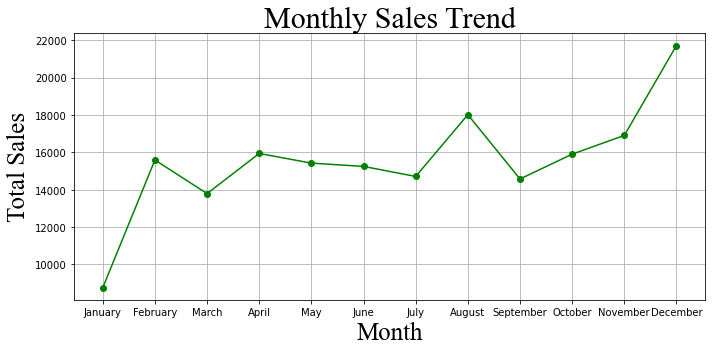

In [145]:
plt.figure(figsize=(10, 5))

font="Times New Roman"

plt.plot(monthly_sales['Month_Name'].values, monthly_sales['Total'].values, marker='o', color='g')
plt.title('Monthly Sales Trend', fontname=font, fontsize=30)
plt.xlabel('Month', fontname=font, fontsize=25)
plt.ylabel('Total Sales', fontname=font, fontsize=25)
plt.grid(True)
plt.tight_layout()
plt.show()

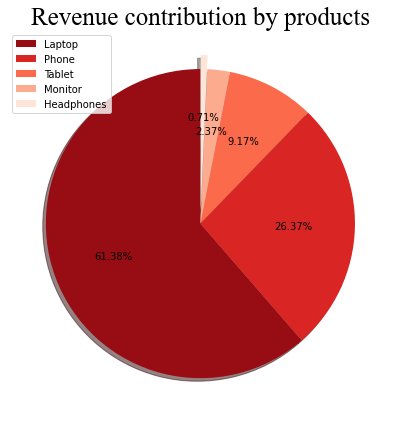

In [122]:
# Revenue contribution by products

plt.figure(figsize=(6, 6))

p_revenue = df.groupby('Product')['Total'].sum().sort_values(ascending=False)

explode = [0, 0, 0, 0, 0.09]
colors = cm.Reds_r([0.1, 0.3, 0.5, 0.7, 0.9])

plt.pie(p_revenue.values,explode=explode, autopct='%.2f%%', colors=colors, shadow=True, startangle=90)
plt.title("Revenue contribution by products", fontname='Times New Roman', fontsize=25)
plt.legend(labels=p_revenue.index)
plt.tight_layout()

In [123]:
df.head()

,OrderID,Date,CustomerID,Product,Quantity,Price,Total,Day,Month
0,1,2024-04-12,C002,Phone,1,600,642.09,Friday,April
1,2,2024-12-14,C003,Laptop,2,1000,2098.39,Saturday,December
2,3,2024-09-27,C017,Monitor,1,200,196.34,Friday,September
3,4,2024-04-16,C005,Phone,3,600,1955.86,Tuesday,April
4,5,2024-03-12,C017,Laptop,1,1000,1098.19,Tuesday,March


Text(0.5, 1.0, 'Quantity vs Total (Jittered)')

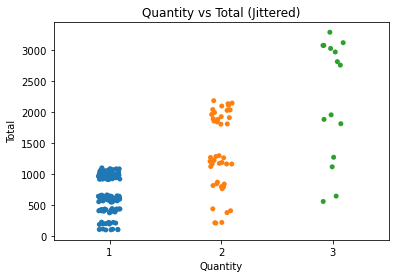

In [148]:
# What is the relationship between Quantity vs Total

sns.stripplot(data=df, x='Quantity', y='Total', jitter=True)
plt.title("Quantity vs Total (Jittered)")
